In [21]:
import matplotlib.pyplot as plt
from splane import *
import numpy as np
import scipy.signal as sig
from splane import analyze_sys
from scipy import signal
import matplotlib.pyplot as plt
from splane import bodePlot, pzmap
import sympy as sp
import math

Tomamos una transferencia Notch normalizada, pasabajos y con el denominador correspondiente a un butterworth de segundo orden:

$$T(s) = K \cdot \frac{s^2 + {w_n}^2}{ (s^2 + \sqrt{2}s + 1)}$$

Tiene una frecuencia de corte de w = 2, así que

$$T(s) = \frac{s^2 + 4}{ (s^2 + \sqrt{2}s + 1)}$$

La ganancia ahí es de 4, $20log(4) \approx 12 $ que es lo que observamos en la imagen

Finalmente queda:

$$w_n = 0$$
$$w_p = 1$$
$$Q_p = \frac{1}{\sqrt{2}}$$
$$w_n = 2$$
$$K = 1$$

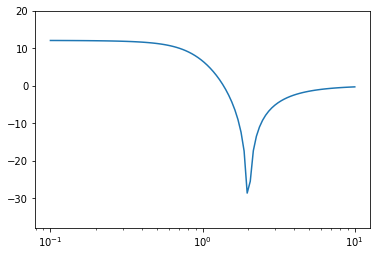

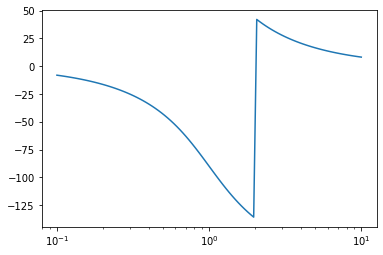

In [44]:
num=[1,0,4]
dem=[1,1.4142,1]

sys = signal.TransferFunction(num, dem)

# Docs https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag) # Bode magnitude plot
plt.ylim([-38,20])

plt.figure()
plt.semilogx(w, phase) # Bode phase plot

plt.show()


(1, <AxesSubplot:xlabel='$\\sigma$', ylabel='j$\\omega$'>)

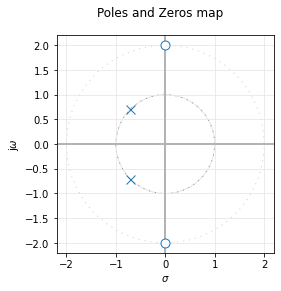

In [45]:
pzmap(sys) # Diagrama de polos y ceros. Función con efectos colaterales.

Intenté primero con un notch pero queda en -30dB, cuando en el dibujo ronda los -6dB, así te das cuenta rápidamente que no es un notch sino un pasabanda normalizado. 

$$T(s) = K \cdot \frac{s^2 + \frac{1}{\sqrt(2)}s + 1}{ s^2 + \sqrt{2}s + 1}$$

De esta forma obtenemos la ganancia deseada

$$w_n = 0$$
$$w_p = 1$$
$$Q_p = \frac{1}{\sqrt{2}}$$
$$w_n = 2$$
$$K = 1$$

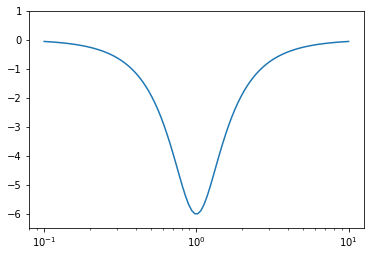

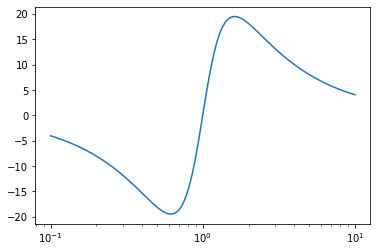

In [88]:
K = 1
num=[K*1,0.707,K*1]
dem=[1,1.4142,1]

sys = signal.TransferFunction(num, dem)

# Docs https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.bode.html
w, mag, phase = signal.bode(sys)

plt.figure()
plt.semilogx(w, mag) # Bode magnitude plot
plt.ylim([-6.5,1])

plt.figure()
plt.semilogx(w, phase) # Bode phase plot

plt.show()